## Import stuff

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob, os, string, nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

nltk.download(info_or_id='stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to /home/aledts/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Get data

In [4]:
data_dir = "./lyrics/"

lyrics = pd.concat([pd.read_csv(f).assign(genre=os.path.basename(f).split(".")[0]) for f in glob.glob(data_dir+"*.csv")])

## Visualize data

    By lyrics lenght

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fefd38cb518>,
      dtype=object)

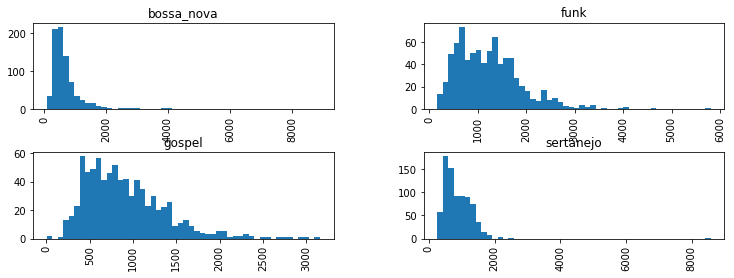

In [21]:
lyrics['length'] = lyrics['lyric'].apply(len)
lyrics.hist(column='length', by='genre', bins=50,figsize=(12,4))

### Clean data

In [8]:
def text_clean(mess):
    nopunc = [c for c in mess if c not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [w for w in nopunc.split() if w.lower() not in stopwords.words('portuguese')]

## Pipeline
    Text pre processing, normalization, puts weight and classifies

In [7]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_clean)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

### Split data
    Split data for testing and evaluation

In [15]:
lyric_train, lyric_test, genre_train, genre_test = \
train_test_split(lyrics['lyric'], lyrics['genre'], test_size=0.2)

## Train model and evaluate

In [16]:
pipeline.fit(lyric_train, genre_train)
predictions = pipeline.predict(lyric_test)
print(classification_report(predictions, genre_test))

              precision    recall  f1-score   support

  bossa_nova       0.55      0.94      0.69        99
        funk       0.79      0.95      0.86       129
      gospel       0.90      0.87      0.89       174
   sertanejo       0.88      0.54      0.67       238

   micro avg       0.78      0.78      0.78       640
   macro avg       0.78      0.83      0.78       640
weighted avg       0.82      0.78      0.77       640

